In [3]:
import tensorflow as tf

In [5]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)
print(train_targets)
#train_data[0]

In [7]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [8]:
def build_model():
 model = models.Sequential() 
 model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
 model.add(layers.Dense(64, activation='relu'))
 model.add(layers.Dense(1))
 model.compile(optimizer='rmsprop', loss='mse', metrics = ['mae'])
 return model

In [13]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
all_mae_histories = []
for i in range(k):
 print('processing fold #', i)
 val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
 val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
 partial_train_data = np.concatenate( [train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
 partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
 model = build_model() 
 history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
 val_mse, val_mae = model.evaluate(val_data, val_targets,verbose=0)
 all_scores.append(val_mae)

 mae_history = history.history['mae']
 all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [14]:
average_mae_history = [
 np.mean([x[i] for x in all_mae_histories]) for i in
range(num_epochs)]

In [15]:
print(all_scores)
print(np.mean(all_scores))
print(average_mae_history)

[2.157142400741577, 2.183915615081787, 2.952911615371704, 2.3076250553131104]
2.4003986716270447
[10.985305070877075, 3.8117247223854065, 3.081531584262848, 2.7550289630889893, 2.5781649351119995, 2.4635176062583923, 2.3789108395576477, 2.311413824558258, 2.2668233513832092, 2.237291157245636, 2.196846842765808, 2.130558431148529, 2.1389485597610474, 2.1099089980125427, 2.066842794418335, 2.055768698453903, 2.0392953157424927, 2.0359615087509155, 2.0082359611988068, 1.9891524016857147, 1.9795421063899994, 1.9234175086021423, 1.9297685623168945, 1.9097411632537842, 1.8498120307922363, 1.8705023229122162, 1.849539577960968, 1.8194621801376343, 1.8324397504329681, 1.8114304840564728, 1.7692477405071259, 1.7928244471549988, 1.763070285320282, 1.7864543795585632, 1.7466408014297485, 1.7413274645805359, 1.7169552445411682, 1.6940878331661224, 1.7115411460399628, 1.7232974469661713, 1.7021034955978394, 1.709880292415619, 1.6876346468925476, 1.660516232252121, 1.6581190526485443, 1.60713648796

In [17]:
[len(x) for x in all_mae_histories]

[100, 100, 100, 100]

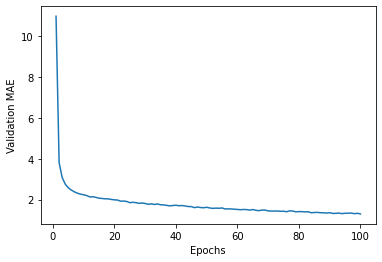

In [18]:
plt.plot(range(1, len(average_mae_history) + 1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

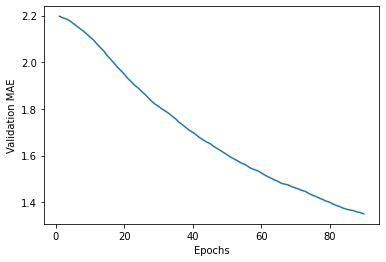

In [23]:
def smooth_curve(points, factor=0.9):
 smoothed_points = []
 for point in points:
   if smoothed_points:
     previous = smoothed_points[-1]
     smoothed_points.append(previous * factor + point * (1 -factor))
   else:
     smoothed_points.append(point)
 return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()